<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/transformaciones_ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import scipy as sp

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU



In [10]:
stock = 'META'
ticker = yf.Ticker(stock)
hist2 = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

hist2

,Close
Date,
2013-01-01 00:00:00-05:00,30.887003
2013-02-01 00:00:00-05:00,27.168201
2013-03-01 00:00:00-05:00,25.503212
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276905
...,...
2023-08-01 00:00:00-04:00,295.001801
2023-09-01 00:00:00-04:00,299.308807
2023-10-01 00:00:00-04:00,300.365601


In [11]:
# prompt: change index from format 'yyyy-mm-dd 00:00:00-00:00' to 'yyyy-mm-dd'

hist2.index = hist2.index.strftime('%Y-%m-%d')

In [12]:
hist2.index = pd.to_datetime(hist2.index)
hist2.index


DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

In [13]:
hist2

,Close
Date,
2013-01-01,30.887003
2013-02-01,27.168201
2013-03-01,25.503212
2013-04-01,27.686640
2013-05-01,24.276905
...,...
2023-08-01,295.001801
2023-09-01,299.308807
2023-10-01,300.365601


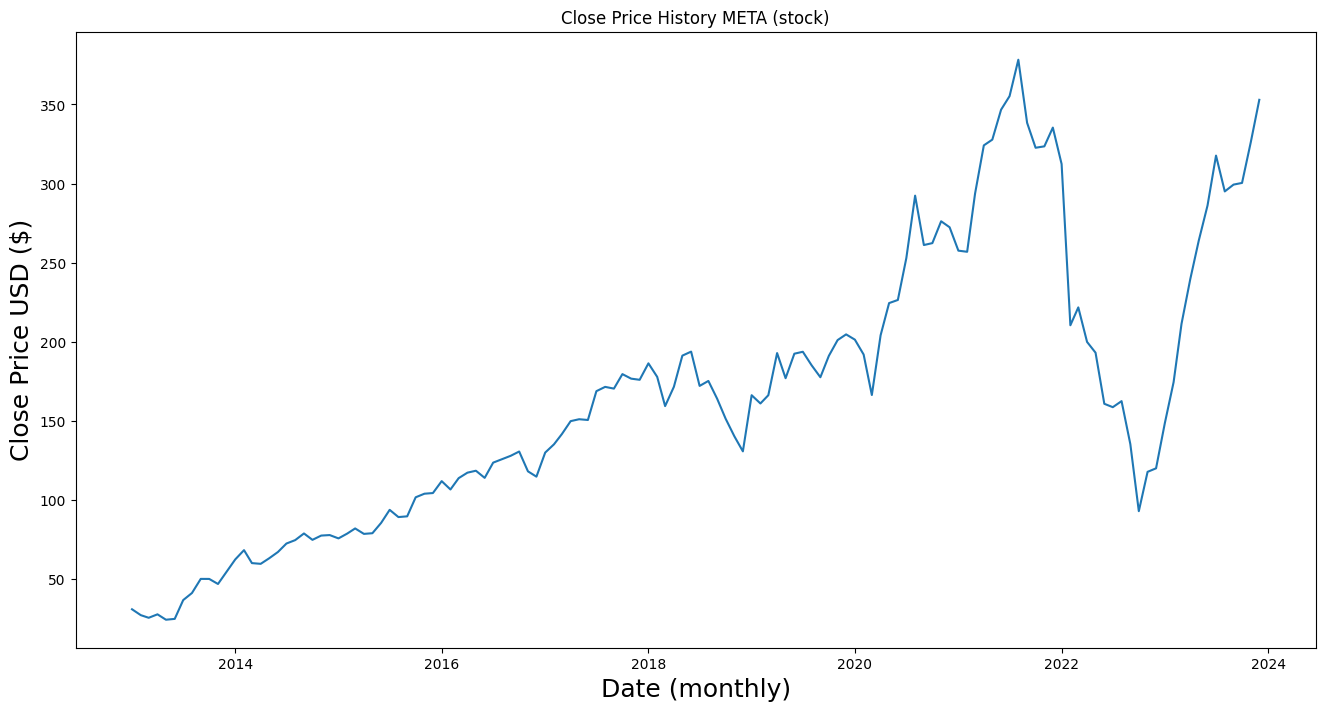

In [14]:
plt.figure(figsize=(16,8))
plt.title('Close Price History META (stock)')
plt.plot(hist2)
plt.xlabel('Date (monthly)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
hist2.diff().skew()

-1.5323493551689769

<Axes: xlabel='Date'>

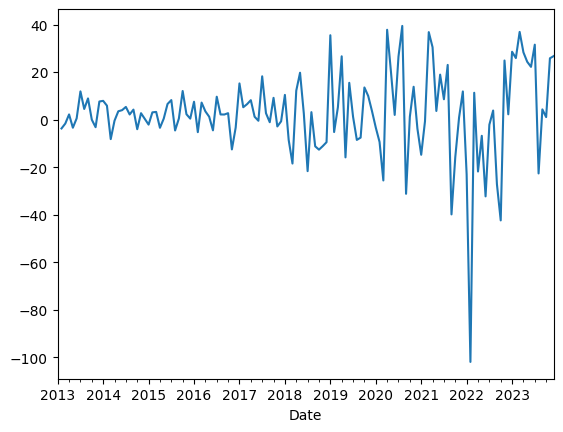

In [16]:
hist2.diff().plot()

<Axes: >

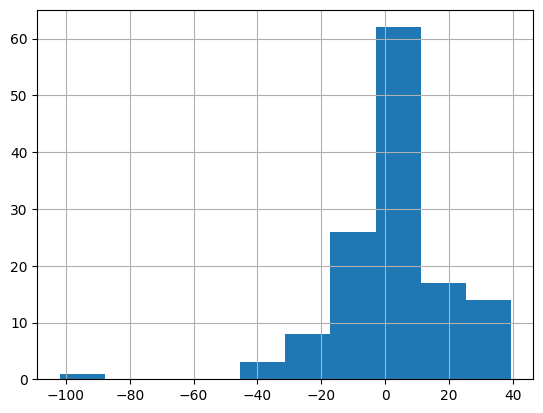

In [17]:
hist2.diff().hist()

## CAMBIO PORCENTUAL

In [19]:
hist2.pct_change().skew()


0.3399031597057147

<Axes: xlabel='Date'>

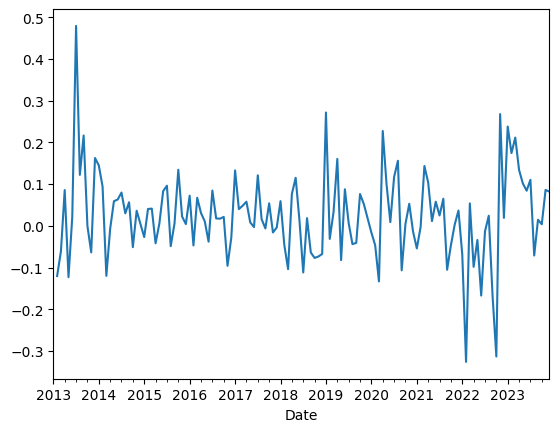

In [20]:
hist2.pct_change().plot()


Valores y comportamientos atípicos más notorios e identificables, se estandariza a partir de lo que es el retorno (muy parecido a lo que conocemos como error).

<Axes: >

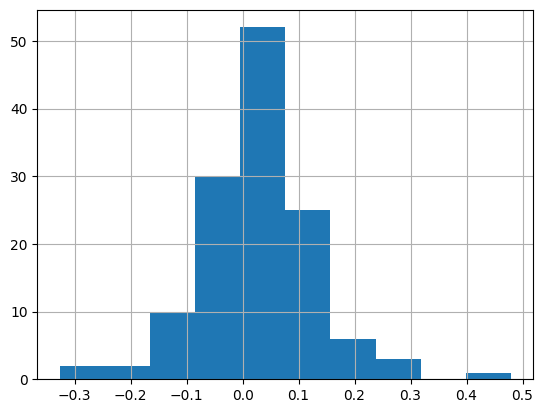

In [21]:
hist2.pct_change().hist()

## Escalar con min y MAX


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
miMA = MinMaxScaler()
hist2_scaled = miMA.fit_transform(hist2.values.reshape(-1,1))

In [24]:
# sesgo con el nuevo valor

sp.stats.skew(hist2_scaled, bias=False)

array([0.48226392])

In [25]:
# desviación estándar

hist2_scaled.std()

0.24804596447843832

## Desplazar los datos


## Estandarización


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
est = StandardScaler()
hist2_est = est.fit_transform(hist2.values.reshape(-1,1))


In [28]:
sp.stats.skew(hist2_est, bias=False)

array([0.48226392])

In [30]:
hist2_est.std()

1.0

In [31]:
hist2_est.mean()

5.3828995133340925e-17

## Datos atípicos OUTLIERS

#### Tres desviaciones estándar

In [36]:
sum(np.abs((sp.stats.zscore(hist2)) > 2))

4

In [37]:
hist2[(np.abs(sp.stats.zscore(hist2)) > 2)]

,Close
Date,
2021-06-01,346.666229
2021-07-01,355.230469
2021-08-01,378.241180
2023-12-01,352.897491


## Rangos intercuartílicos


In [38]:
q1 = hist2.quantile(0.25)
q3 = hist2.quantile(0.75)
iqr = q3 - q1
iqr

112.55860328674316

In [ ]:
hist